In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('MDS.csv')

/Users/hades/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df.head()

Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good               51           Moderate  
1             Good               41               Good  
2             Good               66           Moderate  
3             Good               20               Good  
4             Good                6               Good

In [3]:
df.shape

(23463, 12)

In [4]:
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


Worst-AQI

In [6]:
worst_AQI = df.iloc[:,[0,1,2]]

In [7]:
worst_AQI.sort_values('AQI Value',ascending=False).head()

Country          City  AQI Value
19540   India       Haldaur        500
830     India  Mahendragarh        500
22071   India      Barkhera        500
644     India        Khetri        500
702     India   Jahangirpur        500

In [8]:
worst_AQI['AQI Value'].mean()

72.01086817542513

<AxesSubplot:>

/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDepreca

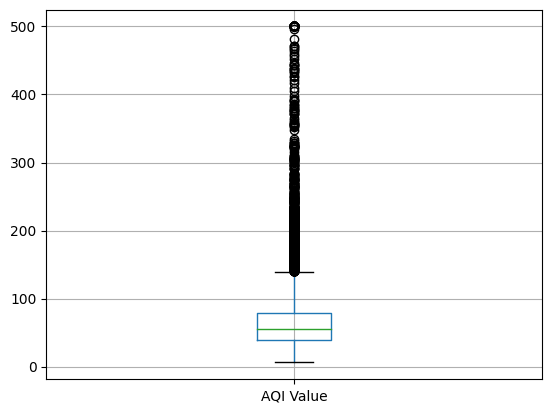

In [9]:
worst_AQI.boxplot('AQI Value')

In [33]:
def remove_outliers(df, column_name, threshold=2.5):
    mean = df[column_name].mean()
    std_dev = df[column_name].std()

    z_scores = np.abs((df[column_name] - mean) / std_dev)
    filtered_df = df[z_scores < threshold]
    return filtered_df

df_filtered = remove_outliers(worst_AQI, 'AQI Value')

In [34]:
df_filtered.sort_values('AQI Value',ascending=False).head(10)

Country                      City  AQI Value
5916          India                      Aron        212
4988   South Africa                     Brits        212
8529          India                    Mundwa        212
10470         India                  Marhaura        212
8692      Indonesia                 Kadungora        212
4941         Mexico  San Pablo De Las Salinas        211
13548       Senegal                    Dagana        211
15233         India              Jaswantnagar        211
17219  South Africa                   Midrand        211
7209          India                    Bayana        211

<AxesSubplot:>

/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDepreca

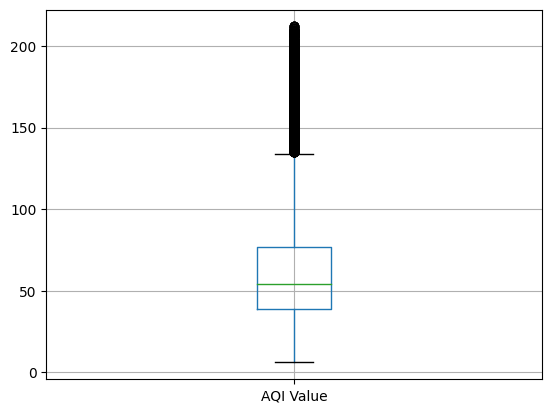

In [35]:
df_filtered.boxplot('AQI Value')

Co-relations (AQI with Different Gasses)

1. AQI and CO

In [13]:
column1 = df['AQI Value']
column2 = df['CO AQI Value']

mean_column1 = sum(column1) / len(column1)
mean_column2 = sum(column2) / len(column2)

numerator = sum((x - mean_column1) * (y - mean_column2) for x, y in zip(column1, column2))
denominator1 = sum((x - mean_column1) ** 2 for x in column1)
denominator2 = sum((y - mean_column2) ** 2 for y in column2)

correlation_coefficient = numerator / ((denominator1 * denominator2) ** 0.5)
correlation_coefficient

0.43060164285158825

In [14]:
column1 = df['PM2.5 AQI Value']
column2 = df['CO AQI Value']

mean_column1 = sum(column1) / len(column1)
mean_column2 = sum(column2) / len(column2)

numerator = sum((x - mean_column1) * (y - mean_column2) for x, y in zip(column1, column2))
denominator1 = sum((x - mean_column1) ** 2 for x in column1)
denominator2 = sum((y - mean_column2) ** 2 for y in column2)

correlation_coefficient = numerator / ((denominator1 * denominator2) ** 0.5)
correlation_coefficient

0.43855723425314186

<AxesSubplot:xlabel='AQI Value', ylabel='CO AQI Value'>

/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDepreca

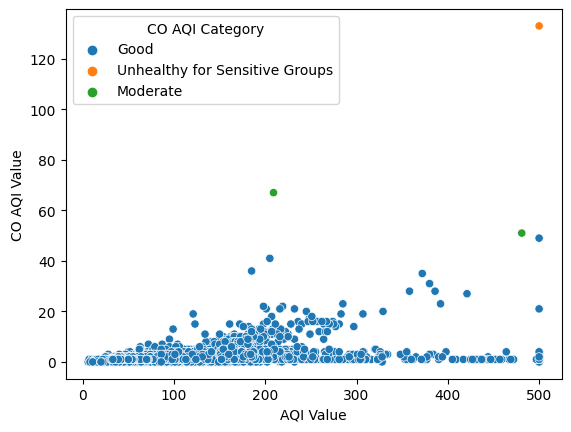

In [15]:
sns.scatterplot(x = df['AQI Value'], y = df['CO AQI Value'],hue = df['CO AQI Category'])

2. AQI and O3

In [16]:
column1 = df['AQI Value']
column2 = df['Ozone AQI Value']

mean_column1 = sum(column1) / len(column1)
mean_column2 = sum(column2) / len(column2)

numerator = sum((x - mean_column1) * (y - mean_column2) for x, y in zip(column1, column2))
denominator1 = sum((x - mean_column1) ** 2 for x in column1)
denominator2 = sum((y - mean_column2) ** 2 for y in column2)

correlation_coefficient = numerator / ((denominator1 * denominator2) ** 0.5)
correlation_coefficient

0.40530975781741774

In [17]:
column1 = df['PM2.5 AQI Value']
column2 = df['Ozone AQI Value']

mean_column1 = sum(column1) / len(column1)
mean_column2 = sum(column2) / len(column2)

numerator = sum((x - mean_column1) * (y - mean_column2) for x, y in zip(column1, column2))
denominator1 = sum((x - mean_column1) ** 2 for x in column1)
denominator2 = sum((y - mean_column2) ** 2 for y in column2)

correlation_coefficient = numerator / ((denominator1 * denominator2) ** 0.5)
correlation_coefficient

0.3398865061115976

<AxesSubplot:xlabel='AQI Value', ylabel='Ozone AQI Value'>

/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDepreca

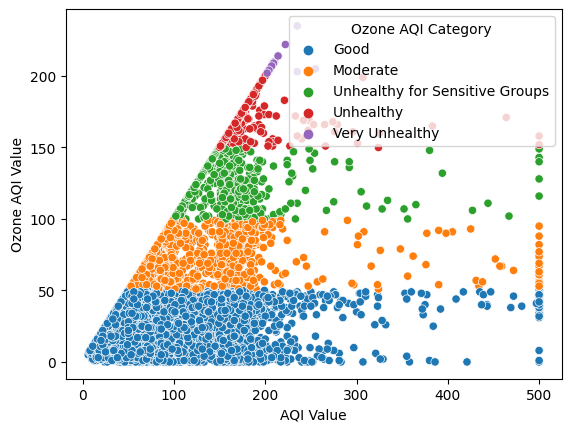

In [39]:
sns.scatterplot(x = df['AQI Value'], y = df['Ozone AQI Value'],hue = df['Ozone AQI Category'])

3. AQI and NO2

In [19]:
column1 = df['AQI Value']
column2 = df['NO2 AQI Value']

mean_column1 = sum(column1) / len(column1)
mean_column2 = sum(column2) / len(column2)

numerator = sum((x - mean_column1) * (y - mean_column2) for x, y in zip(column1, column2))
denominator1 = sum((x - mean_column1) ** 2 for x in column1)
denominator2 = sum((y - mean_column2) ** 2 for y in column2)

correlation_coefficient = numerator / ((denominator1 * denominator2) ** 0.5)
correlation_coefficient

0.23175791460153441

In [20]:
column1 = df['PM2.5 AQI Value']
column2 = df['NO2 AQI Value']

mean_column1 = sum(column1) / len(column1)
mean_column2 = sum(column2) / len(column2)

numerator = sum((x - mean_column1) * (y - mean_column2) for x, y in zip(column1, column2))
denominator1 = sum((x - mean_column1) ** 2 for x in column1)
denominator2 = sum((y - mean_column2) ** 2 for y in column2)

correlation_coefficient = numerator / ((denominator1 * denominator2) ** 0.5)
correlation_coefficient

0.26012668329855054

<AxesSubplot:xlabel='AQI Value', ylabel='NO2 AQI Value'>

/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDepreca

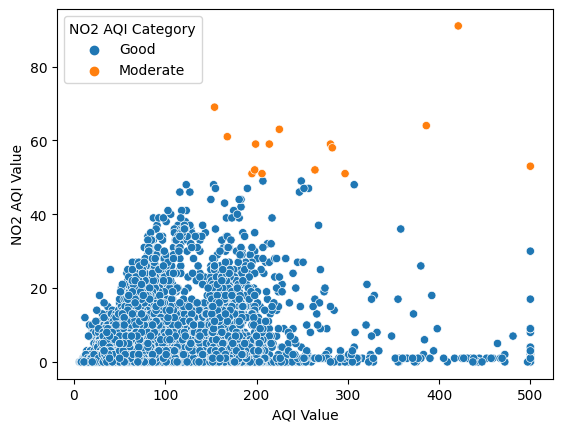

In [37]:
sns.scatterplot(x = df['AQI Value'], y = df['NO2 AQI Value'],hue = df['NO2 AQI Category'])

4. AQI and PM2.5 AQI Value

In [22]:
column1 = df['PM2.5 AQI Value']
column2 = df['AQI Value']

mean_column1 = sum(column1) / len(column1)
mean_column2 = sum(column2) / len(column2)

numerator = sum((x - mean_column1) * (y - mean_column2) for x, y in zip(column1, column2))
denominator1 = sum((x - mean_column1) ** 2 for x in column1)
denominator2 = sum((y - mean_column2) ** 2 for y in column2)

correlation_coefficient = numerator / ((denominator1 * denominator2) ** 0.5)
correlation_coefficient

0.9843265891583869

<AxesSubplot:xlabel='AQI Value', ylabel='PM2.5 AQI Value'>

/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDepreca

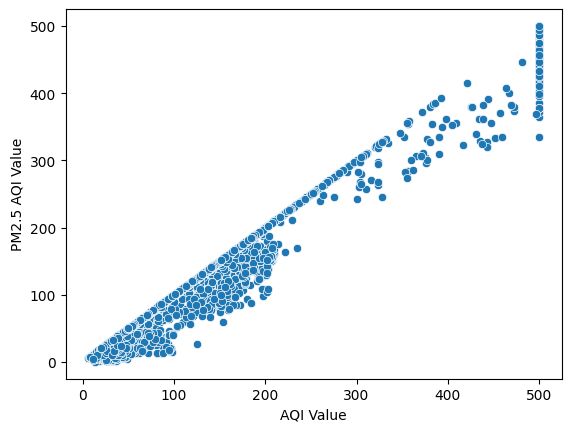

In [23]:
sns.scatterplot(x = df['AQI Value'], y = df['PM2.5 AQI Value'])

In [24]:
matrix = df.iloc[:,[2,4,6,8,10]]

In [25]:
matrix.corr()

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
AQI Value         1.000000      0.430602         0.405310       0.231758   
CO AQI Value      0.430602      1.000000         0.145724       0.488092   
Ozone AQI Value   0.405310      0.145724         1.000000      -0.181818   
NO2 AQI Value     0.231758      0.488092        -0.181818       1.000000   
PM2.5 AQI Value   0.984327      0.438557         0.339887       0.260127   

                 PM2.5 AQI Value  
AQI Value               0.984327  
CO AQI Value            0.438557  
Ozone AQI Value         0.339887  
NO2 AQI Value           0.260127  
PM2.5 AQI Value         1.000000

/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDepreca

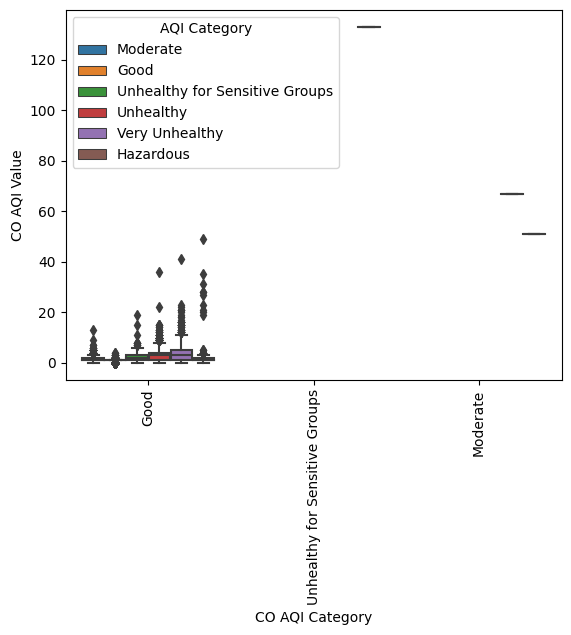

In [26]:
sns.boxplot(x = df['CO AQI Category'], y = df['CO AQI Value'], hue = df['AQI Category'])
plt.xticks(rotation=90)
plt.show()

/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDepreca

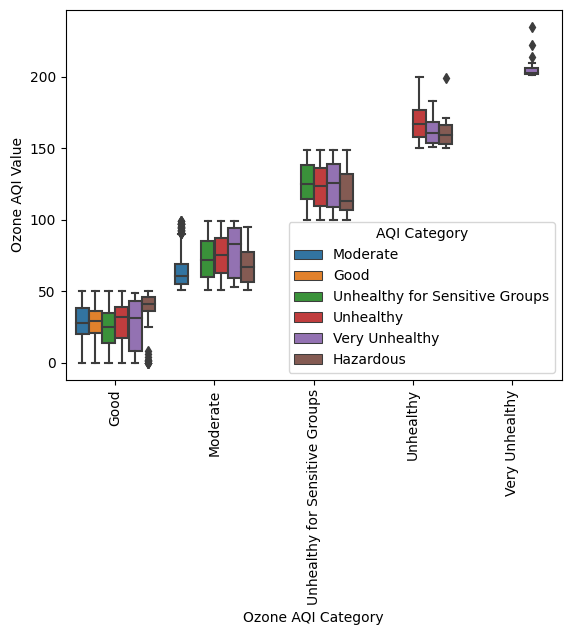

In [27]:
sns.boxplot(x = df['Ozone AQI Category'], y = df['Ozone AQI Value'], hue = df['AQI Category'])
plt.xticks(rotation=90)
plt.show()

/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDepreca

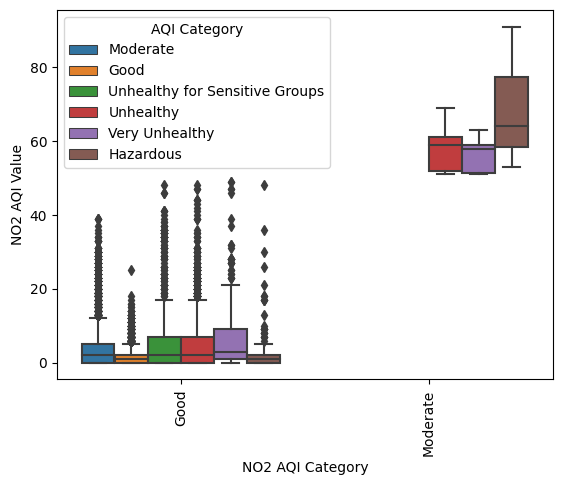

In [28]:
sns.boxplot(x = df['NO2 AQI Category'], y = df['NO2 AQI Value'], hue = df['AQI Category'])
plt.xticks(rotation=90)
plt.show()

Professional

In [29]:
from pandas_profiling import ProfileReport
output = ProfileReport(df)
output

/var/folders/q8/0k0tg1g55tz613bwbfllk2700000gn/T/ipykernel_19935/2196582386.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDepreca

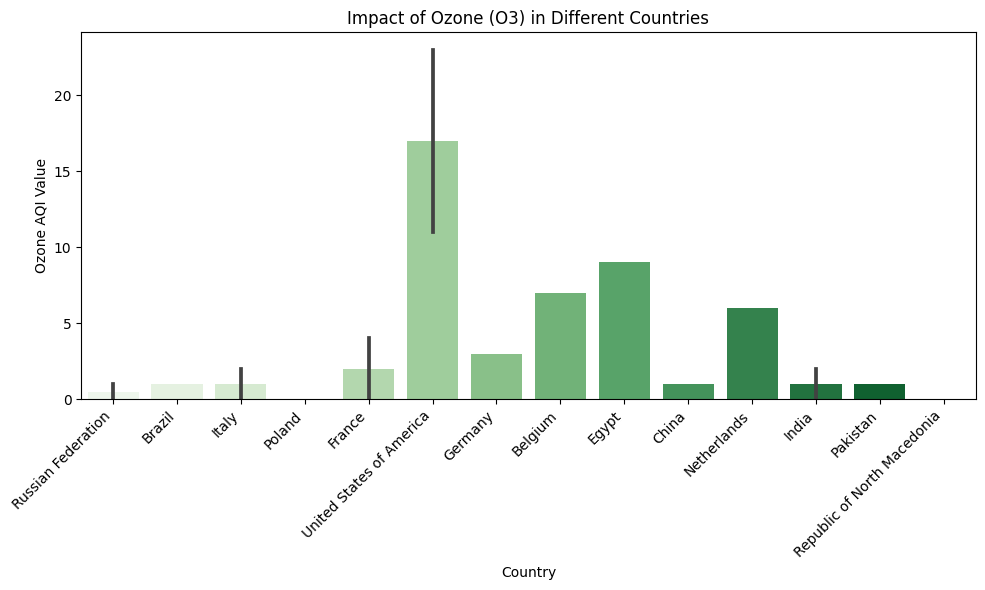

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='NO2 AQI Value', data=df.head(20), palette='Greens')
plt.xlabel('Country')
plt.ylabel('Ozone AQI Value')
plt.title('Impact of Ozone (O3) in Different Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDepreca

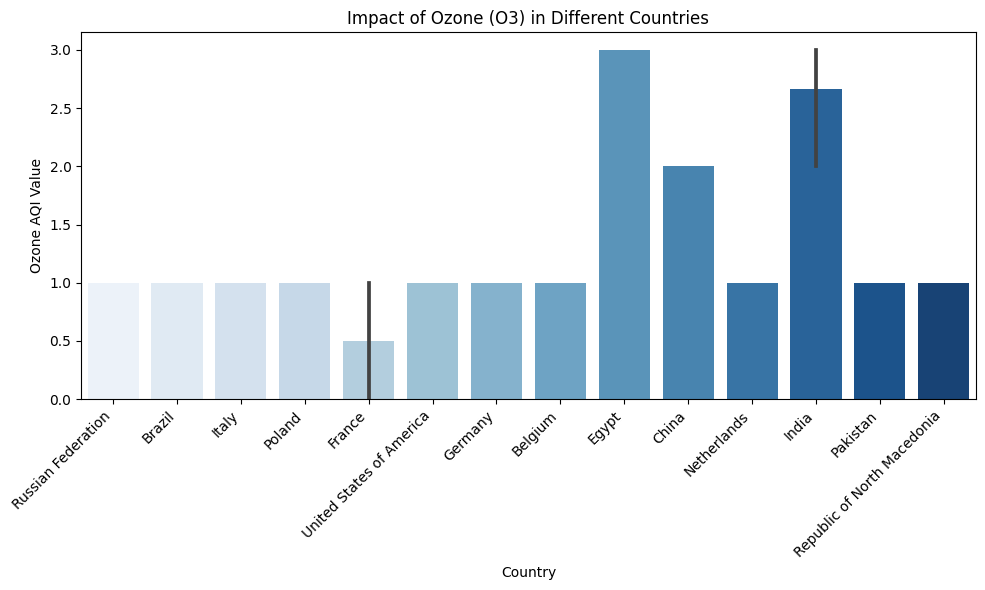

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='CO AQI Value', data=df.head(20), palette='Blues')
plt.xlabel('Country')
plt.ylabel('Ozone AQI Value')
plt.title('Impact of Ozone (O3) in Different Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hades/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDepreca

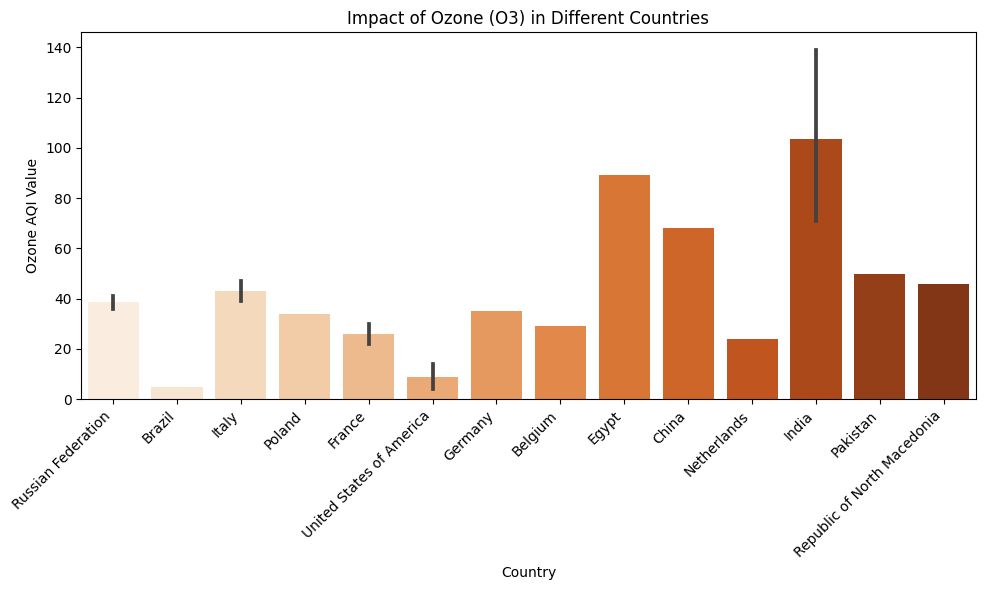

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Ozone AQI Value', data=df.head(20), palette='Oranges')
plt.xlabel('Country')
plt.ylabel('Ozone AQI Value')
plt.title('Impact of Ozone (O3) in Different Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()